<a href="https://colab.research.google.com/github/Yuri-Vlasqz/Imersao_de_dados_Alura_2022/blob/main/Imers%C3%A3o_de_dados_Alura_(2022)_aulas_%2B_desafios_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4º Imersão de dados Alura (2022)**
**Aulas 1 e 2**

Instrutores:
---
- Thiago Gonçalves - Machine Learning Engineering Manager na Creditas
- Vivian Yamassaki - Lead Data Scientist I na Creditas
- Paulo Silveira - Co-fundador e CEO da Alura
___
Autor: Yuri Velasquez
---
[Github](https://github.com/Yuri-Vlasqz)

___
Datasets utilizados
---
- Imóveis SP: 
    - [Original Kaggle](https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo)
    - [Utilizado nas aulas](https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv)


In [74]:
# Importação de blibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

# Parâmetros Globais
pd.set_option('display.float_format', lambda x: '%.2f' %x)
pd.set_option("max_columns", None)
sns.set()

# Link Datasets
imoveis_sp_url = "https://raw.githubusercontent.com/Yuri-Vlasqz/Imersao_de_dados_Alura_2022/main/dados_imoveis.csv"

## Funções 

In [11]:
def col_para_float(dados, col):
    """
    Transforma uma coluna de um dataframe do tipo string em float.

    Parametros
    ----------
    dados: dataframe
        Tabela de dados.
    col: string
        Coluna tipo 'str' do dataset.
        
    Retorna
    -------
    dados_col_float: dataframe
        Tabelas com tipo da coluna transformada.

    Exemplos
    --------
    dados_col_float = col_para_float(dados, 'coluna')
    """

    # Transformando coluna "Valor" de string para float
    dados["Tipo_anuncio"] = dados[col].str.split(expand = True)[2]
    dados[col] = dados[col].str.split(expand = True)[1]
    dados[col] = dados[col].str.replace(".","",regex=True).astype(float)

    display(dados.head(5))

    return dados

In [12]:
def remove_aluguel(dados):
    """
    Remove as linhas com anuncio de tipo aluguel por ano, mes ou dia

    Parameters
    ----------
    dados: dataframe
        Tabela de dados
        
    Returns
    -------
    sem_aluguel: dataframe
        Tabela sem linhas de alugueis
        
    Examples
    --------
    sem_aluguel = remove_aluguel(dados)
    """    

    # Removendo as linhas do tipo aluguel (/dia, /mes, /ano)
    dados = dados[dados['Tipo_anuncio'].isnull()]
    dados = dados.drop(columns=['Tipo_anuncio'])

    linhas, colunas = dados.shape
    print(f'Dataset sem aluguéis: {linhas} Linhas X {colunas} Colunas')
    display(dados.head())

    return dados

In [13]:
def corr_matrix(data, cmap='divergent'):
    """
    It reads a dataframe and show a Lower Triangle Correlation Matrix.

    Parameters
    ----------
    data: dataframe
        Tabela ou colunas da tabela a serem correlacionadas (tipo numerico)
    cmap: string 
        Representa o mapa de cores (default='divergent' or 'sequencial')
        
    Returns
    -------
    matriz: None
        Mostra a matriz de correlação na chamada da função
        
    Examples
    --------
    corr_matrix(data[lista_colunas], 'cmap')
    """    

    # Lower Triangle Correlation Matrix
    corr_df = data.corr()
    corr_shape = corr_df.shape
    tri_df = corr_df.where(np.tril(np.ones(corr_shape)).astype(bool))

    # Figure Ploting parameters
    if cmap == "sequential":
        cmap = "rocket"
    else:
        cmap = "coolwarm"

    plt.figure(figsize=(corr_shape))
    sns.heatmap(tri_df, linewidths=0.5, annot=True, cmap=cmap)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=40, ha='right')

    return

In [14]:
def missing_values(dataset):
    """
    It reads a dataframe and check Missing Values.

    Parameters
    ------
    dataset: dataframe
        Table with dataset to be checked.
        
    Returns
    ------
    MissingSummary: dataframe
        Table with missing values statistics.

    Examples
    ------
    nulls_data = missing_values(dataset)
    """

    categories = []
    null_list = []
    null_percent = []

    for column in dataset:
        categories.append(column)
        null_list.append(dataset[column].isnull().sum())
        null_percent.append(round( (null_list[-1] / dataset.shape[0]) *100, 3))

    nulls_data = pd.DataFrame({'Field Name': categories, 
                                'Total Missing Values': null_list, 
                                'Missing Percentage': null_percent})
    print('Dataset shape:')
    print(f'{dataset.shape[0]} rows X {dataset.shape[1]} columns')

    return nulls_data

## Inicialização

In [15]:
# Baixando e criando tabelas de dados
imoveis_df = pd.read_csv(imoveis_sp_url)
# Tabela gerada
print(f'Dataset Imoveis\nLinhas:{imoveis_df.shape[0]} X colunas:{imoveis_df.shape[1]}')
display(imoveis_df.head())

Dataset Imoveis
Linhas:10008 X colunas:8


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [16]:
# Tranformando coluna valor em float e gerando coluna de tipo de anuncio
imoveis_val_float_df = col_para_float(imoveis_df, 'Valor')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,None


In [17]:
# Removendo linhas com anuncio de tipo aluguel \dia, \mes e \ano
imoveis_vendas_df = remove_aluguel(imoveis_val_float_df)

Dataset sem aluguéis: 9156 Linhas X 8 Colunas


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00


In [18]:
# Criando coluna de preço por metro quadrado
imoveis_vendas_df.insert(loc=8, column='Preco_m2', value=(imoveis_vendas_df.Valor / imoveis_vendas_df.Metragem))
imoveis_vendas_df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00


In [20]:
# --- Bairro/Imóvel Outlier ---
display(imoveis_df[imoveis_df['Bairro'] == 'Vila Guaca'])
print('\n')
# Retirando Bairro Outlier (Vila Guaca)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['Bairro'] == 'Vila Guaca'].index)
imoveis_df[imoveis_df['Bairro'] == 'Vila Guaca']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,800000.00,None


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio


## **Desafios Aula 1**

1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)





### Média da metragem para cada um dos bairros

In [21]:
# Desafio 1
medias = imoveis_df.groupby(['Bairro']).mean()['Metragem'].sort_values()
bairros = medias.index
med_metragem = medias.values
pd.DataFrame({'Bairros': bairros, 
              'Metragem média': med_metragem})

,Bairros,Metragem média
0,Vila Leonor,46.00
1,Jardim Benfica,48.00
2,Jardim Nova Germania,57.00
3,Cidade Antônio Estevão de Carvalho,57.50
4,Jardim São Jorge (Raposo Tavares),62.00
...,...,...
695,Chácara Flora,1260.73
696,Jardim das Camélias,1700.00
697,Jardim Guedala,2486.64
698,Vila Castelo,2850.00


### 2 formas de selecionar os dados por bairro

In [24]:
# Desafio 2 + curiosidade de saber qual mais rápido
bairro = 'Chácara Flora'

# forma 1: df[condição] (possivel selecionar várias condições)
start = time.time()
display(imoveis_df[imoveis_df['Bairro'] == bairro])
end = time.time()
print(f"Tempo forma 1: {round((end - start), 3)} segundos\n")

# forma 2: df.isin() (possivel selecionar lista de valores)
start = time.time()
display(imoveis_df[imoveis_df['Bairro'].isin([bairro])])
end = time.time()
print(f"Tempo forma 2: {round((end - start), 3)} segundos\n")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio
328,"Rua dos Alcatrazes, 304",Chácara Flora,São Paulo,1300,5,8,9,10000000.00,None
1101,Rua Adamantina,Chácara Flora,São Paulo,771,4,4,6,8500000.00,None
1111,Rua Tombadouro,Chácara Flora,São Paulo,632,4,5,6,8000000.00,None
4314,Rua dos Alcatrazes,Chácara Flora,São Paulo,1300,6,6,9,10000000.00,None
4417,Rua dos Alcatrazes,Chácara Flora,São Paulo,1305,6,6,9,10000000.00,None
6512,Rua Utinga,Chácara Flora,São Paulo,1500,5,8,4,25000000.00,None
7191,Rua Utinga,Chácara Flora,São Paulo,1505,5,8,4,25000000.00,None
8136,NaN,Chácara Flora,São Paulo,1300,5,8,9,42000.00,/Mês
8878,NaN,Chácara Flora,São Paulo,1305,5,8,9,42000.00,/Mês
8907,Rua Junqueira,Chácara Flora,São Paulo,1650,3,5,6,15000000.00,None


Tempo forma 1: 0.031 segundos



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio
328,"Rua dos Alcatrazes, 304",Chácara Flora,São Paulo,1300,5,8,9,10000000.00,None
1101,Rua Adamantina,Chácara Flora,São Paulo,771,4,4,6,8500000.00,None
1111,Rua Tombadouro,Chácara Flora,São Paulo,632,4,5,6,8000000.00,None
4314,Rua dos Alcatrazes,Chácara Flora,São Paulo,1300,6,6,9,10000000.00,None
4417,Rua dos Alcatrazes,Chácara Flora,São Paulo,1305,6,6,9,10000000.00,None
6512,Rua Utinga,Chácara Flora,São Paulo,1500,5,8,4,25000000.00,None
7191,Rua Utinga,Chácara Flora,São Paulo,1505,5,8,4,25000000.00,None
8136,NaN,Chácara Flora,São Paulo,1300,5,8,9,42000.00,/Mês
8878,NaN,Chácara Flora,São Paulo,1305,5,8,9,42000.00,/Mês
8907,Rua Junqueira,Chácara Flora,São Paulo,1650,3,5,6,15000000.00,None


Tempo forma 2: 0.028 segundos



### Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF

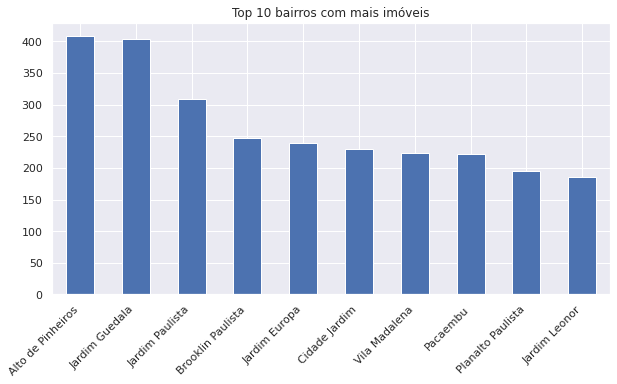

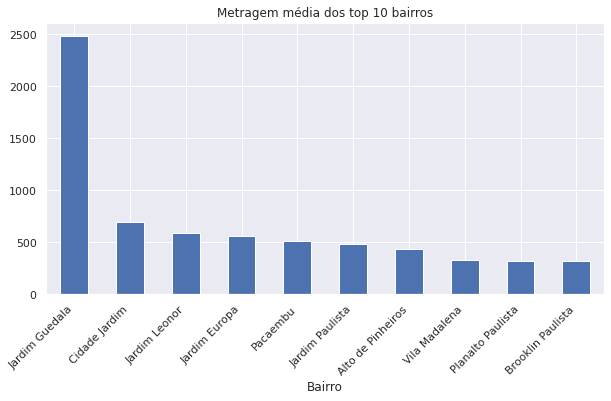

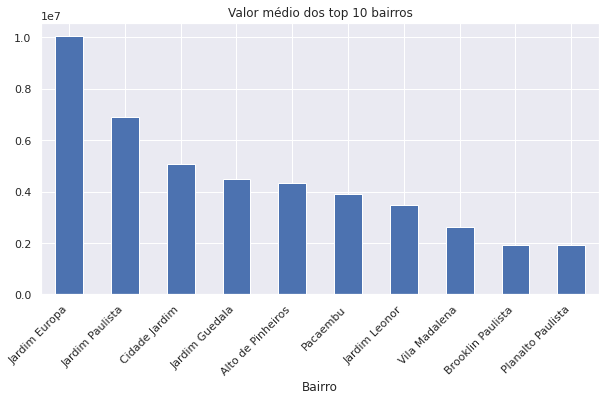

In [26]:
# Desafio 3
# Top 10 bairros com mais imoveis
top10_bairros = imoveis_df['Bairro'].value_counts().head(10)
top10_df = imoveis_df[imoveis_df.Bairro.isin(top10_bairros.index)]

# Grafico top 10 bairros com mais imoveis
plt.figure(figsize=(10,5))
plt.title('Top 10 bairros com mais imóveis') 
top10_bairros.plot.bar()
plt.xticks(rotation=45, ha='right')
plt.show()

print('')

# Grafico das medias de metragem dos top 10 bairros
plt.figure(figsize=(10,5))
plt.title('Metragem média dos top 10 bairros')
top10_df.groupby('Bairro')['Metragem'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.show()

print('')

# Grafico das medias de valor dos top 10 bairros
plt.figure(figsize=(10,5))
plt.title('Valor médio dos top 10 bairros')
top10_df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.show()

Entre os to 10 bairros com mais imoveis a venda, Jardim Guedala se destaca na metragem média, Jardim Europa se destaca no valor medio

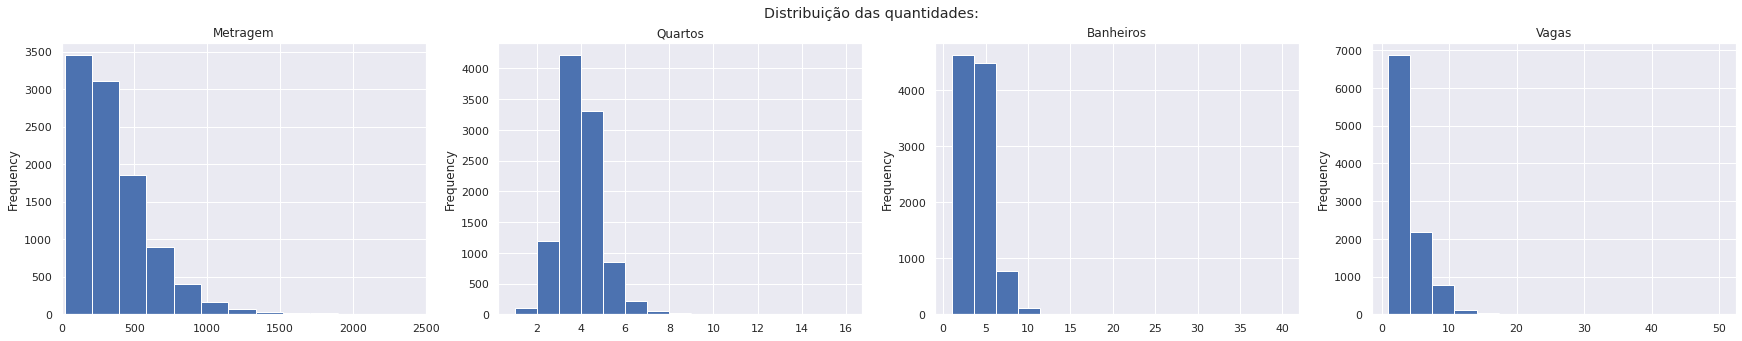

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(30,5))
plt.suptitle('Distribuição das quantidades:')
imoveis_df['Metragem'].plot.hist(ax=ax[0], bins=4000, title='Metragem',xlim=(0,2500))
imoveis_df['Quartos'].plot.hist(ax=ax[1], bins=15, title='Quartos')
imoveis_df['Banheiros'].plot.hist(ax=ax[2], bins=15, title='Banheiros')
imoveis_df['Vagas'].plot.hist(ax=ax[3], bins=15, title='Vagas')
plt.show()

### Pegar outros estatísticas dos dados, média, mediana, mim, max

In [10]:
# Desafio 4
print('colunas categoricas')
display(imoveis_df[['Rua','Bairro','Cidade']].describe())
print('colunas numericas')
imoveis_df.describe()

colunas categoricas


,Rua,Bairro,Cidade
count,6574,9996,10008
unique,3130,701,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,409,10008


colunas numericas


,Metragem,Quartos,Banheiros,Vagas
count,10008.00,10008.00,10008.00,10008.00
mean,442.30,3.48,3.88,4.10
std,7515.38,1.06,1.99,2.82
min,10.00,1.00,1.00,1.00
25%,173.00,3.00,2.00,2.00
50%,290.00,3.00,4.00,4.00
75%,460.25,4.00,5.00,5.00
max,750000.00,16.00,40.00,50.00


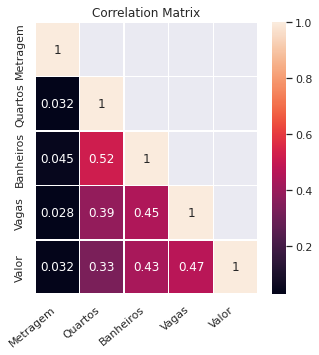

In [ ]:
colunas = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor']
# Matriz Correlação
corr_matrix(imoveis_df[colunas],'sequential')

In [ ]:
# Desafio 5
# Contagem de ruas nulas
ruas_nulas = imoveis_df[imoveis_df['Rua'].isnull()]['Bairro'].value_counts()

# Percentual de ruas nulas
ruas = imoveis_df['Bairro'].value_counts()
percent_ruas_nulas = []
for rua in ruas_nulas.index:
    percent = (ruas_nulas.loc[rua] / ruas.loc[rua]) * 100
    percent_ruas_nulas.append(percent)

# Tabela com estatistica das ruas nulas por bairro
pd.DataFrame({'Bairros': ruas_nulas.index, 
              'Contagem de ruas nulas': ruas_nulas.values, 
              'Percentual de nulas': percent_ruas_nulas})

,Bairros,Contagem de ruas nulas,Percentual de nulas
0,Jardim Guedala,156,44.19
1,Alto de Pinheiros,151,40.92
2,Jardim Paulista,126,47.37
3,Jardim Europa,107,50.95
4,Jardim Leonor,107,62.94
...,...,...,...
388,Jardim Monte Alegre,1,100.00
389,Vila Aparecida,1,100.00
390,Jardim Ponte Rasa,1,100.00
391,Jardim Marília,1,100.00


## **Desafios Aula 2**

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers

### Criar uma escala de valores em milhões + Deixar o gráfico do histograma de valores legível

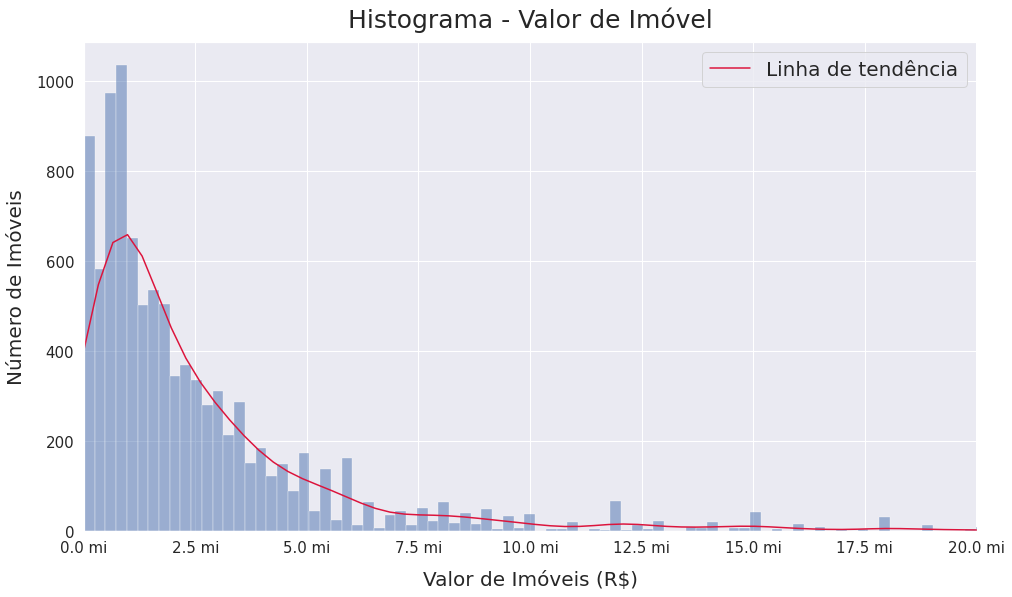

In [44]:
# Criar uma escala de valores em milhões +
# Deixar o gráfico do histograma de valores legível

plt.figure(figsize=(16, 9))

# histograma + kde
ax = sns.histplot(data = imoveis_df['Valor'], kde=True)
ax.lines[0].set_color('crimson')

# Labels
plt.legend(['Linha de tendência'], prop={'size': 20})
ax.set_title('Histograma - Valor de Imóvel', fontsize=25, pad=15)
ax.set_ylabel('Número de Imóveis', fontsize=20, labelpad=10)
ax.set_xlabel('Valor de Imóveis (R$)', fontsize=20, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Somente remove notacao cientifica (numeros puros)
#plt.ticklabel_format(axis="x", style="plain")

# Escala em Milhoes em R$
plt.xlim(0, 20000000)
# ax.set_xticks(np.arange(0, 20000001, 2000000)) # espacamento entre ticks
x_labels = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f} mi'.format(x/1000000) for x in x_labels])

# Mostrando Graficos
plt.show()

### Preço do metro quadrado por bairro plotado em um gráfico ideal

In [49]:
# Preço do metro quadrado por bairro e plotar em um gráfico ideal

# Criando coluna de preço por metro quadrado
imoveis_df.insert(loc=8, column='Preco_m2',
                  value=( imoveis_df.Valor/imoveis_df.Metragem ))
imoveis_df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,None


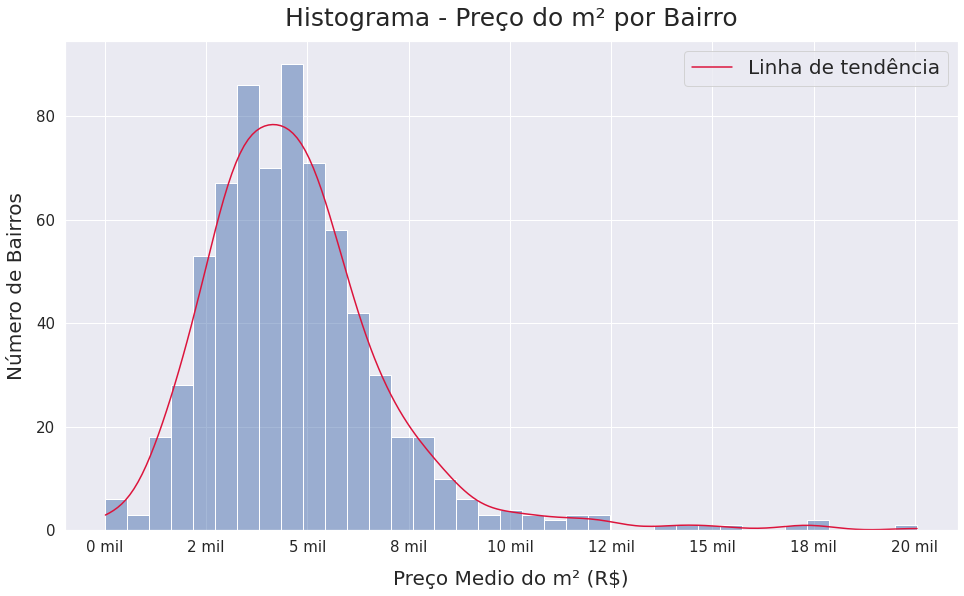

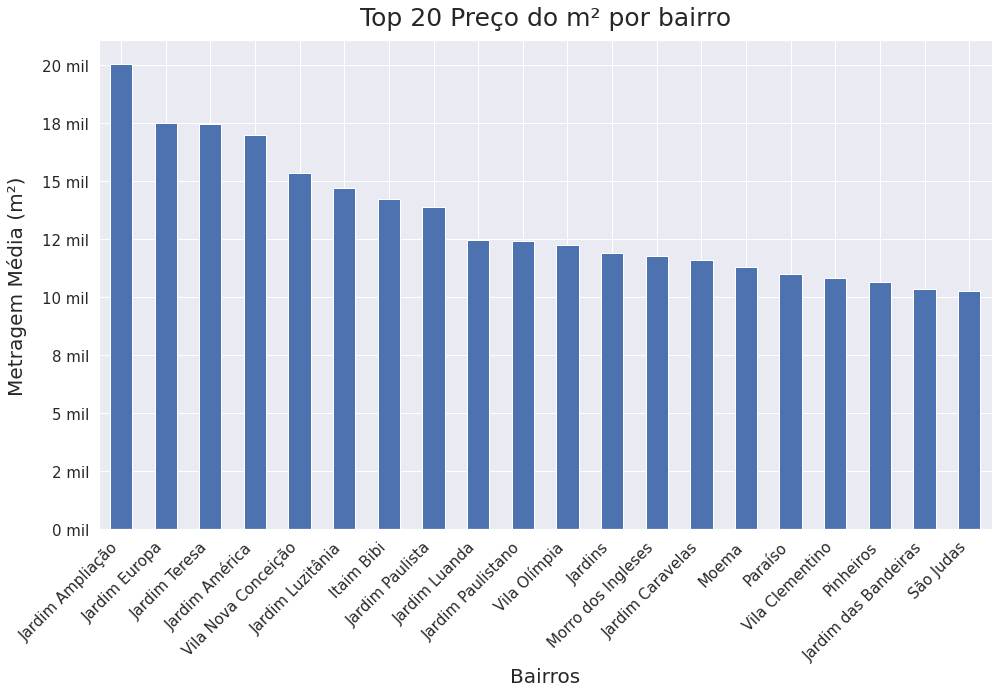

In [50]:
# --- Lista ordenada por preço do metro quadrado por bairro ---
preco_m2_bairro = imoveis_df.groupby(['Bairro']).mean()['Preco_m2'].sort_values(ascending=False) 


# --- Histograma preço do metro quadrado por bairro ---
plt.figure(figsize=(16, 9))

# histograma + kde
ax = sns.histplot(data = preco_m2_bairro, kde=True)
ax.lines[0].set_color('crimson')

# Labels
plt.legend(['Linha de tendência'], prop={'size': 20})
ax.set_title('Histograma - Preço do m² por Bairro', fontsize=25, pad=15)
ax.set_ylabel('Número de Bairros', fontsize=20, labelpad=10)
ax.set_xlabel('Preço Medio do m² (R$)', fontsize=20, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Escala em Milhoes em R$
#plt.xlim(0, 20000000)
# ax.set_xticks(np.arange(0, 20000001, 2000000)) # espacamento entre ticks
x_labels = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f} mil'.format(x/1000) for x in x_labels])

# Mostrando
plt.show()

print('')

# --- top bairros ---
top = 20
preco_m2_bairro = preco_m2_bairro[:top] 

# Grafico Barras
plt.figure(figsize=(16, 9))
ax = preco_m2_bairro.plot.bar()

# Labels
ax.set_title(f'Top {top} Preço do m² por bairro', fontsize=25, pad=15)
ax.set_ylabel('Metragem Média (m²)', fontsize=20, labelpad=15)
ax.set_xlabel('Bairros', fontsize=20)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.yticks(fontsize=15)

# Escala de milhar em m²
y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f} mil'.format(y/1000) for y in y_labels])

plt.show()

### Explorar as bibliotecas de visualizações e colocar conclusão

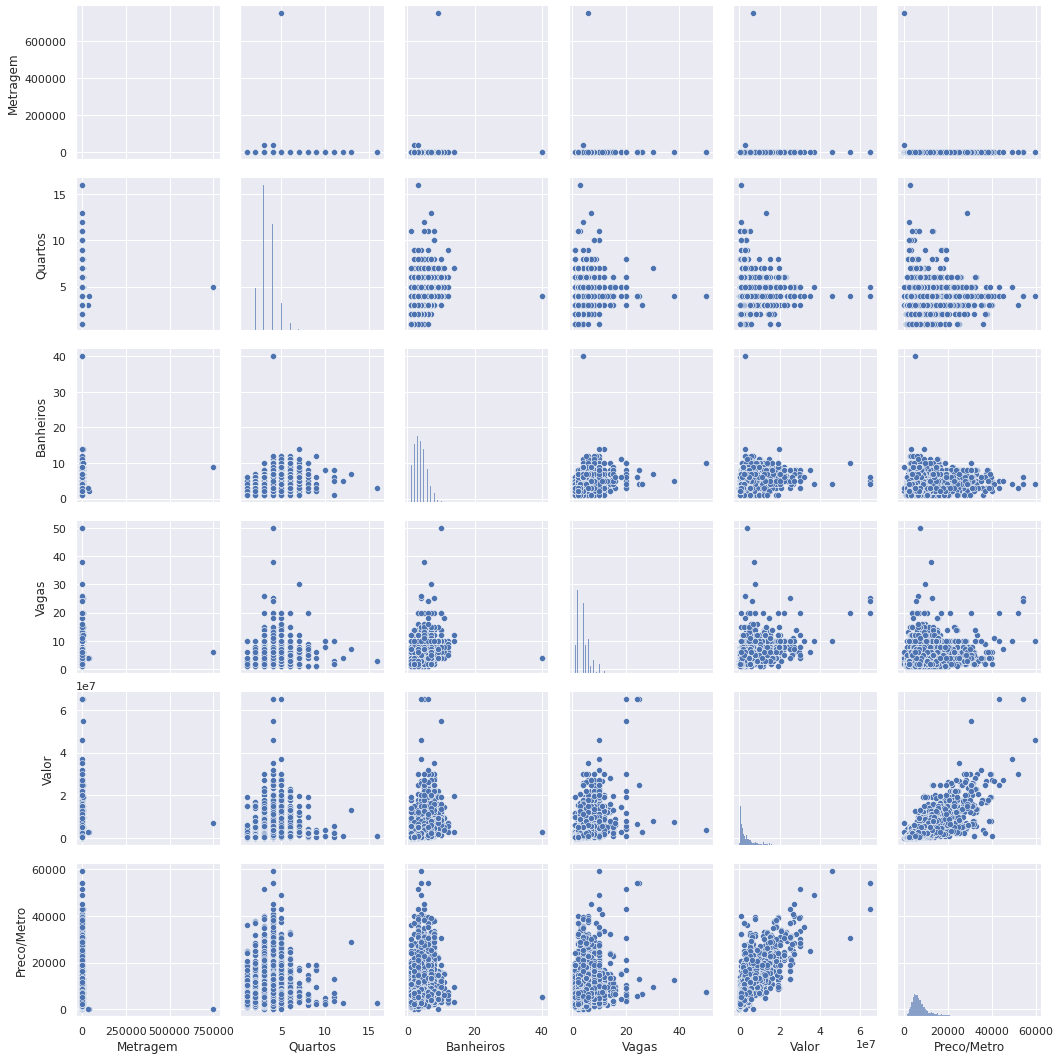

In [ ]:
# Explorar as bibliotecas de visualizações e colocar as suas conclusão
sns.pairplot(imoveis_df)

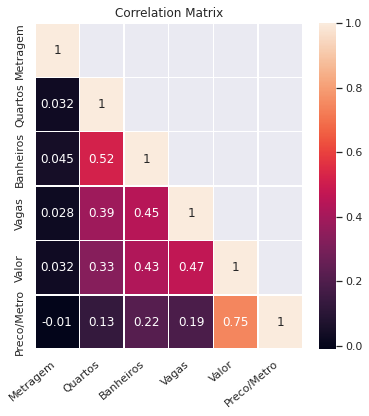

In [ ]:
corr_matrix(imoveis_df, 'sequential')

É possivel verificar que os dados de metragem não tem correlacao significativa com valor dos imoveis.

Isso pode ser devido a grande variabilidade de precos de metro quadrado entre os bairro, impossibilitando de deduzir o preco de um imovel somente pela metragem

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


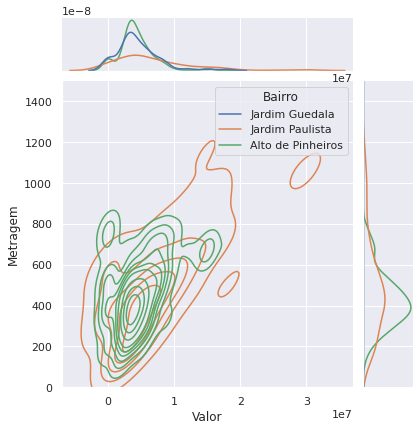

In [67]:
# top 5 bairros com mais imoveis
top2_bairros = imoveis_df['Bairro'].value_counts().head(3).index
top2_df = imoveis_df[imoveis_df['Bairro'].isin(top2_bairros)]

#sns.lmplot(data=top5_df,x="Valor", y="Metragem", hue="Bairro", height=10)
sns.jointplot(
    data=top2_df,
    x="Valor", y="Metragem", hue="Bairro",
    kind="kde", ylim=(0,1500)
)

Casa bairro possui uma area de cobertura do grafico de Metragem X Preco diferente, pode-se inferir que jardim paulista possui seus maiores valores de imoveis maiores que qual valor do bairro o alto do pinheiros

### visualização para analisar os quartis, mediana e outliers

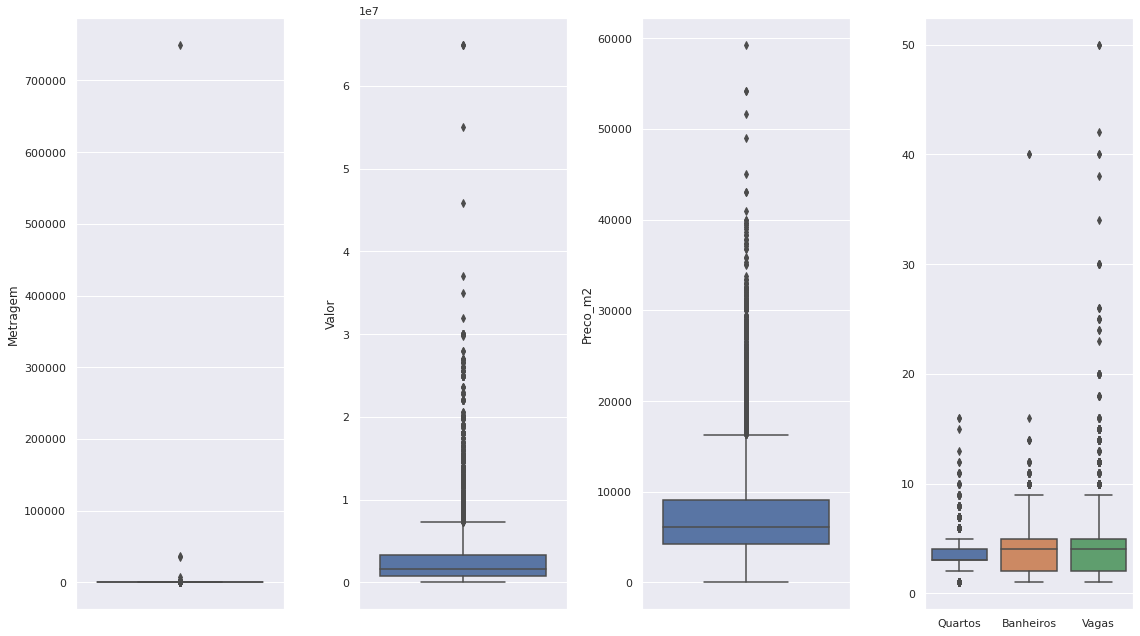

array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
        500000.,  600000.,  700000.,  800000.])

In [70]:
# Pesquisar um visualização para analisar os quartis, mediana e outliers
# --- boxplot COM ouliers ---
fig, ax = plt.subplots(1,4, figsize=(16,9))

sns.boxplot(data=imoveis_df, y='Metragem', ax=ax[0])

sns.boxplot(data=imoveis_df, y='Valor', ax=ax[1])

sns.boxplot(data=imoveis_df, y='Preco_m2', ax=ax[2])

colunas = ['Quartos','Banheiros','Vagas']
sns.boxplot(data=imoveis_df[colunas], ax=ax[3])

fig.tight_layout()
plt.show()
ax[0].get_yticks()

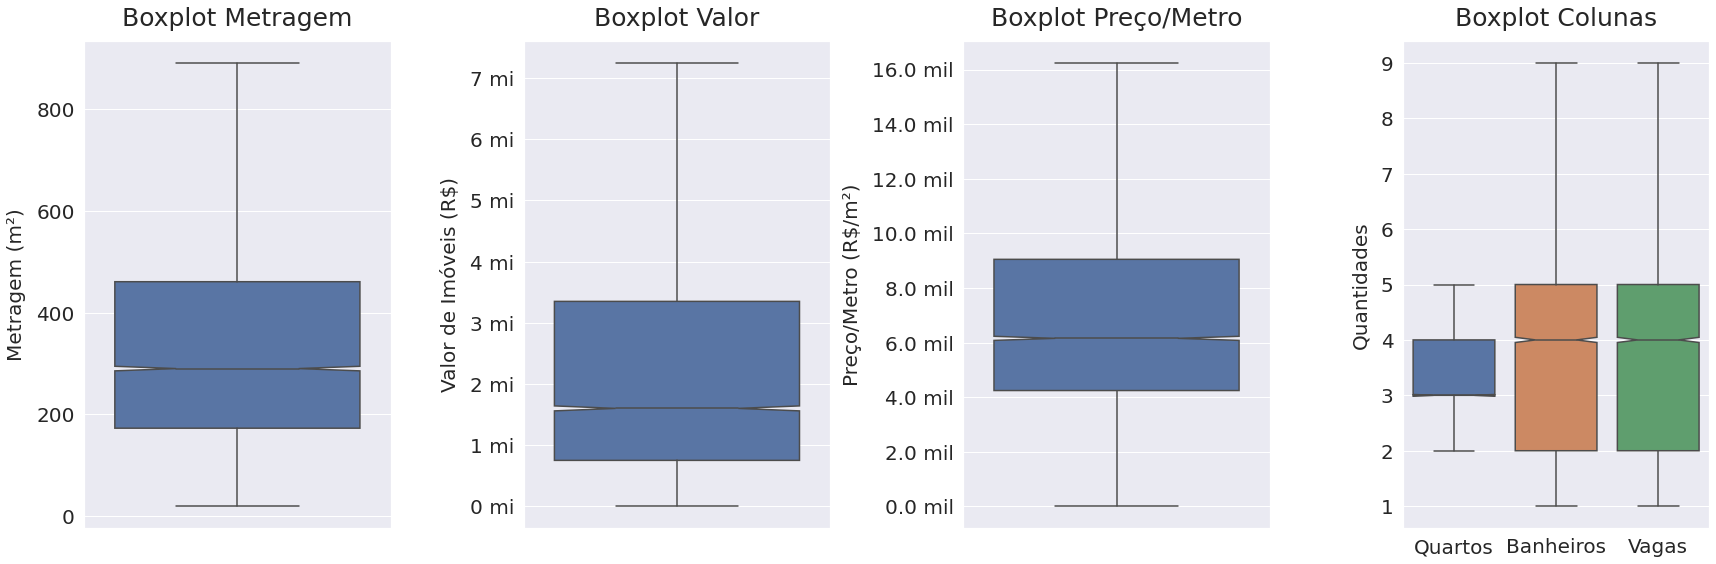

In [73]:
# --- boxplot SEM ouliers ---

fig, ax = plt.subplots(1,4, figsize=(24,8))
# Boxplot Metragem
sns.boxplot(data=imoveis_df, y='Metragem', showfliers=False, notch=True, ax=ax[0])
ax[0].set_title('Boxplot Metragem', fontsize=25, pad=15)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].set_ylabel('Metragem (m²)', fontsize=20, labelpad=10)

# Boxplot Valor
sns.boxplot(data=imoveis_df, y='Valor', showfliers=False, notch=True, ax=ax[1])
ax[1].set_title('Boxplot Valor', fontsize=25, pad=15)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].set_ylabel('Valor de Imóveis (R$)', fontsize=20, labelpad=10)
# Escala de milhão em R$
y_labels = ax[1].get_yticks()
ax[1].set_yticklabels(['{:.0f} mi'.format(y/(10**6)) for y in y_labels])

# Boxplot Preco/Metro
sns.boxplot(data=imoveis_df, y='Preco_m2', showfliers=False, notch=True, ax=ax[2])
ax[2].set_title('Boxplot Preço/Metro', fontsize=25, pad=15)
ax[2].tick_params(axis='both', which='major', labelsize=20)
ax[2].set_ylabel('Preço/Metro (R$/m²)', fontsize=20, labelpad=10)
# Escala de milhar em m²
y_labels = ax[2].get_yticks()
ax[2].set_yticklabels(['{:.1f} mil'.format(y/1000) for y in y_labels])

# Boxplots Quartos, Banheiro e Vagas
colunas = ['Quartos','Banheiros','Vagas']
sns.boxplot(data=imoveis_df[colunas], showfliers=False, notch=True, ax=ax[3])
ax[3].set_title('Boxplot Colunas', fontsize=25, pad=15)
ax[3].tick_params(axis='both', which='major', labelsize=20)
ax[3].set_ylabel('Quantidades', fontsize=20, labelpad=10)

# Ajusta figura aos padings
fig.tight_layout()
plt.show()

In [68]:
imoveis_df.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2
count,10007.00,10007.00,10007.00,10007.00,10007.00,10007.00
mean,442.34,3.48,3.88,4.10,2794368.84,7318.97
std,7515.75,1.06,1.99,2.82,3866390.33,5479.74
min,20.00,1.00,1.00,1.00,1650.00,8.25
25%,173.00,3.00,2.00,2.00,750000.00,4242.42
50%,290.00,3.00,4.00,4.00,1600000.00,6153.85
75%,460.50,4.00,5.00,5.00,3350000.00,9047.62
max,750000.00,16.00,40.00,50.00,65000000.00,59282.02
